In [45]:
import warnings
warnings.filterwarnings('ignore')

In [46]:
import os
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from wordcloud import WordCloud
import numpy as np
import re

In [47]:
df = pd.read_json('Sentiment_anlysis_file.json')

In [48]:
df

,retweet_count,transformed_text
0,1,rt salestechstar anova elevates bar consumer e...
1,174,rt shivkr007 main stream media silent watching...
2,3,rt realdlhughley former restaurant workers sha...
3,2,rt datingdecisions one time early career forwa...
4,11,rt shayararar reporters major news channels wa...
...,...,...
795,0,amandadupont calling amandadupont macgpodcasta...
796,2,rt paddydocherty proposal abolish billionaires...
797,57,rt realtuckfrumper trump charged obstruction e...
798,159,rt mforstater transgender critics protected ne...


In [49]:
df.drop(columns=['retweet_count'],inplace=True)

In [50]:
df

,transformed_text
0,rt salestechstar anova elevates bar consumer e...
1,rt shivkr007 main stream media silent watching...
2,rt realdlhughley former restaurant workers sha...
3,rt datingdecisions one time early career forwa...
4,rt shayararar reporters major news channels wa...
...,...
795,amandadupont calling amandadupont macgpodcasta...
796,rt paddydocherty proposal abolish billionaires...
797,rt realtuckfrumper trump charged obstruction e...
798,rt mforstater transgender critics protected ne...


In [51]:
#Columns renames
df.rename(columns = {'transformed_text':'text'}, inplace = True)

In [52]:
df

,text
0,rt salestechstar anova elevates bar consumer e...
1,rt shivkr007 main stream media silent watching...
2,rt realdlhughley former restaurant workers sha...
3,rt datingdecisions one time early career forwa...
4,rt shayararar reporters major news channels wa...
...,...
795,amandadupont calling amandadupont macgpodcasta...
796,rt paddydocherty proposal abolish billionaires...
797,rt realtuckfrumper trump charged obstruction e...
798,rt mforstater transgender critics protected ne...


In [53]:
#Data cleaning
def cleantext(text):
    text = re.sub(r'@[A-Za-z0-9]+','',text) #Remove @mention
    text = re.sub(r'#','',text) # Revoe the # symbol
    text = re.sub(r'rt[\s]+','',text) # Remove RT
    text = re.sub(r'https?:\/\/\S+','',text) # Remove the Hyper link
    
    return text

In [54]:
df['text'] = df['text'].apply(cleantext)

In [55]:
df

,text
0,salestechstar anova elevates bar consumer enga...
1,shivkr007 main stream media silent watching st...
2,realdlhughley former restaurant workers sharin...
3,datingdecisions one time early career forwarde...
4,shayararar reporters major news channels waiti...
...,...
795,amandadupont calling amandadupont macgpodcasta...
796,paddydocherty proposal abolish billionaires gr...
797,realtuckfrumper trump charged obstruction even...
798,mforstater transgender critics protected new f...


## Word Cloud

In [56]:
wc = WordCloud(width=900,height=800,min_font_size=10,background_color='white')

In [57]:
wc_text = wc.generate(df['text'].str.cat(sep = " "))

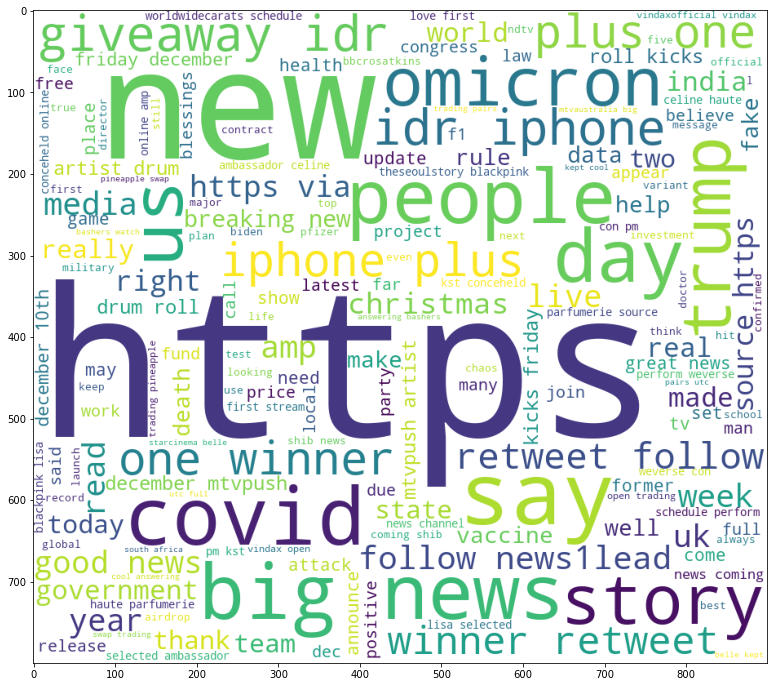

In [58]:
plt.figure(figsize=(16,12))
plt.imshow(wc_text)
plt.show()

Corpora is a group presenting multiple collections of text documents. A single collection is called corpus.

In [59]:
corpus = []
for msg in df['text'].tolist():
    for word in msg.split():
        corpus.append(word)

In [60]:
len(corpus)

8743

In [61]:
from collections import Counter

In [62]:
Counter(corpus).most_common(25)

[('https', 499),
 ('news', 252),
 ('new', 50),
 ('big', 37),
 ('december', 36),
 ('one', 35),
 ('amp', 35),
 ('first', 31),
 ('people', 27),
 ('full', 27),
 ('covid', 24),
 ('media', 21),
 ('follow', 21),
 ('says', 21),
 ('good', 21),
 ('11', 20),
 ('omicron', 20),
 ('us', 19),
 ('week', 19),
 ('giveaway', 18),
 ('news1lead', 18),
 ('via', 18),
 ('700', 17),
 ('idr', 17),
 ('iphone', 17)]

In [63]:
pd.DataFrame(Counter(corpus).most_common(25),columns=['word','Frequency'])

,word,Frequency
0,https,499
1,news,252
2,new,50
3,big,37
4,december,36
5,one,35
6,amp,35
7,first,31
8,people,27
9,full,27


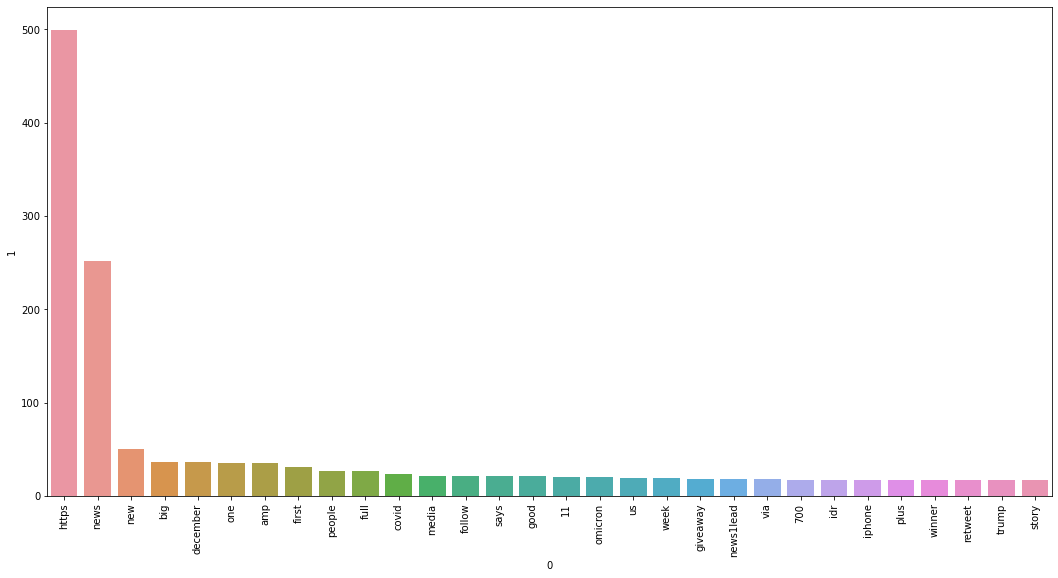

In [64]:
plt.figure(figsize=(18,9))
sns.barplot(pd.DataFrame(Counter(corpus).most_common(30))[0],pd.DataFrame(Counter(corpus).most_common(30))[1])
plt.xticks(rotation = 'vertical')
plt.show()

In [65]:
df

,text
0,salestechstar anova elevates bar consumer enga...
1,shivkr007 main stream media silent watching st...
2,realdlhughley former restaurant workers sharin...
3,datingdecisions one time early career forwarde...
4,shayararar reporters major news channels waiti...
...,...
795,amandadupont calling amandadupont macgpodcasta...
796,paddydocherty proposal abolish billionaires gr...
797,realtuckfrumper trump charged obstruction even...
798,mforstater transgender critics protected new f...


Textblob-It provides a simple API for diving into common natural language processing (NLP) tasks such as part-of-speech tagging, noun phrase extraction, sentiment analysis, classification, translation, and more.

In [66]:
from textblob import TextBlob 

In [67]:
def getPolarity(text):
    return TextBlob(text).sentiment.polarity

df['Polarity'] = df['text'].apply(getPolarity)

In [68]:
df

,text,Polarity
0,salestechstar anova elevates bar consumer enga...,0.000000
1,shivkr007 main stream media silent watching st...,0.083333
2,realdlhughley former restaurant workers sharin...,0.000000
3,datingdecisions one time early career forwarde...,0.200000
4,shayararar reporters major news channels waiti...,0.354167
...,...,...
795,amandadupont calling amandadupont macgpodcasta...,0.000000
796,paddydocherty proposal abolish billionaires gr...,0.000000
797,realtuckfrumper trump charged obstruction even...,0.000000
798,mforstater transgender critics protected new f...,0.268182


In [69]:
def getAnalysis(score):
    if score < 0:
        return 'Negative'
    elif score == 0:
        return 'Neutral'
    else:
        return 'Positive'

In [70]:
df['Analysis'] = df['Polarity'].apply(getAnalysis)

In [71]:
df

,text,Polarity,Analysis
0,salestechstar anova elevates bar consumer enga...,0.000000,Neutral
1,shivkr007 main stream media silent watching st...,0.083333,Positive
2,realdlhughley former restaurant workers sharin...,0.000000,Neutral
3,datingdecisions one time early career forwarde...,0.200000,Positive
4,shayararar reporters major news channels waiti...,0.354167,Positive
...,...,...,...
795,amandadupont calling amandadupont macgpodcasta...,0.000000,Neutral
796,paddydocherty proposal abolish billionaires gr...,0.000000,Neutral
797,realtuckfrumper trump charged obstruction even...,0.000000,Neutral
798,mforstater transgender critics protected new f...,0.268182,Positive


### Print all of the positive Tweets

In [72]:
j=1
sorted_df = df.sort_values(by = ['Polarity'])
for i in range(0,sorted_df.shape[0]):
    if(sorted_df['Analysis'][i] == 'Positive'):
        print(str(j) + ')' + sorted_df['text'][i])
        print()
        j = j + 1

1)shivkr007 main stream media silent watching students campaign twitter thefreepress published news pmoindia

2)datingdecisions one time early career forwarded mom one paper acceptances along reviews replied aww

3)shayararar reporters major news channels waiting outside six senses fobarwara guess best sources

4)news24 bisouthafrica yes old news

5)valuesoffrench beyond devastated passing dear friend simon always joy work generous

6)5 promises people scheduled caste provide free education children free coaching https

7)quicktake president biden promises lower prescription drug prices build back better bill passes senate https

8)papitrumpo mi lara logan best fox news sucks

9)asiaawards1 suneetha ali bagged asia outstanding woman achiever award https asiaawards rulaawards

10)pole vaulter natalie uy delivered podium finish 2021 golden fly series held https

11)1010wins curtissliwa launches super pac defeat senschumer 2022 https https

12)vincent36064321 good liddle saying professor 

### Print all of the Negative Tweets

In [73]:
j=1
sorted_df = df.sort_values(by = ['Polarity'],ascending='False')
for i in range(0,sorted_df.shape[0]):
    if(sorted_df['Analysis'][i] == 'Negative'):
        print(str(j) + ')' + sorted_df['text'][i])
        print()
        j = j + 1

1)alanpps men killed bradley gledhill batley jail terms extended 28 years https

2)chronopost lemondefr least chronopost able make délivery worst company france

3)vajihaqureshi hello vajiha thank reaching us sincerely sorry read please https

4)bharadwajspeaks situation worse pakistan next day mobs destroyed ancient hindu temple rawalpindi

5)chadocl news forthcoming us diplomatic boycott makes already small chance winter olympic breakthrough north

6)stancity44 sad news mazi cletus nwachukwu egoele transferred tiger base owerri subsequently tortured

7)ajenglish least four killed 20 others wounded motorcycle rigged explosives blew near hospital iraq

8)andrear9md annoying wish faux news would crumble

9)tesla price target raised 725 ubs despite recent investigation sec whistleblower https

10)kylenabecker fake news become democratic party approved news term become propaganda weapon

11)occupydemocrats breaking news democratic wisconsin governor tony evers vetoes five republican bills

### Print all of the Neutral Tweets

In [74]:
j=1
sorted_df = df.sort_values(by = ['Polarity'],ascending='False')
for i in range(0,sorted_df.shape[0]):
    if(sorted_df['Analysis'][i] == 'Neutral'):
        print(str(j) + ')' + sorted_df['text'][i])
        print()
        j = j + 1

1)salestechstar anova elevates bar consumer engagement empowerment release anova https

2)realdlhughley former restaurant workers sharing damaging service industry equal parts enraged

3)newsarenaindia indore news taslim ali bangle seller arrested molesting underage girl granted bail court

4)giveaway 700 idr iphone 11 plus one winner retweet follow news1lead

5)front page news medinaspirit https

6)ndtv ndtvexclusive bjp development coconut breaks road open akhilesh yadav sneers read https

7)trump blood oxygen levels fell low got covid man almost gave life https

8)gayeonjunie news

9)prosecute crook cameron crimes https

10)int l commission allows 15 rise pacific bluefin tuna catch limit https

11)bollyhungama salmankhan gave atrangire title aanandlrai reason https

12)variety colin farrell penguin return hbo max series thebatman https

13)cryptoobeast big news coming shib news

14)ah https

15)cryptoobeast big news coming shib news

16)ajenglish namaz allowed friday prayers threate

In [75]:
## get Percentage Positive Tweets

ptweets = df[df.Analysis =='Positive']
ptweets = ptweets['text']

## get Percentage negative Tweets

ntweets = df[df.Analysis =='Negative']
ntweets = ntweets['text']

## get Percentage neutal Tweets

n_tweets = df[df.Analysis =='Neutral']
n_tweets = n_tweets['text']

print("Positive Tweets: ",round((ptweets.shape[0]/df.shape[0])*100,1))
print("Negative Tweets: ",round((ntweets.shape[0]/df.shape[0])*100,1))
print("  Neutal Tweets: ",round((n_tweets.shape[0]/df.shape[0])*100,1))

Positive Tweets:  38.6
Negative Tweets:  16.0
  Neutal Tweets:  45.4


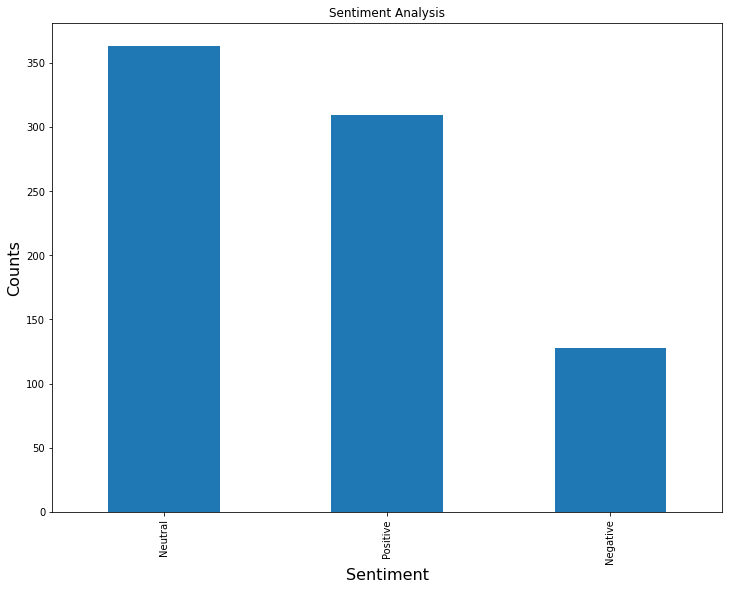

In [76]:
plt.figure(figsize=(12,9))
df['Analysis'].value_counts().plot(kind='bar')
plt.title('Sentiment Analysis')
plt.xlabel('Sentiment',size = 16)
plt.ylabel('Counts',size = 16)
plt.show()